# Daily Template
* 태현씨가 전달한 버전으로 그래프 수정

In [79]:
import os
import nltk
import datetime
import numpy as np

import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager
from konlpy.tag import Twitter

In [80]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
# # 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
# mpl.rcParams['axes.unicode_minus'] = False

# font_dirs = ['./NanumBarunGothic.ttf']
# font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

# for font_file in font_files:
#     font_manager.fontManager.addfont(font_file)


# sns.set(font_scale=1.2)

In [110]:
# set font

# plt.rcParams['font.family'] = 'NanumBarunGothic'

plt.rc('font', family='Malgun Gothic')

In [111]:
date_week = "2022-02-14"

In [112]:
data_path = "../sns_data/{}".format(date_week)
os.makedirs(data_path, exist_ok=True)

In [113]:
plot_path = "../weekly_plots/{}".format(date_week)
os.makedirs(plot_path, exist_ok=True)

In [114]:
fnames = ['youtube', 'facebook', 'article','datalab']
for f in fnames:
    os.makedirs(os.path.join(data_path, f), exist_ok=True)

# Change file name


In [115]:
## artificial data
instagram_follower = 5005
youtube_subscribers = 7395
facebook_follower = 749

In [116]:

# df_yt_subscription = pd.read_csv("../sns_data/2021-10-13/youtube/subscription_data.csv")
# df_yt_gender_age = pd.read_csv("../sns_data/2021-10-13/youtube/gender_age_data.csv")
#df_yt_video_data = pd.read_csv("../sns_data/{}/youtube/Chart data.csv".format(date_week))
df_yt_table_data = pd.read_csv("../sns_data/{}/youtube/Table data.csv".format(date_week))
df_yt_subscription_data = pd.read_csv("../sns_data/{}/youtube/Totals.csv".format(date_week))

# df_fb_contents = pd.read_csv("../sns_data/2021-10-13/facebook/contents.csv")
#df_fb_results = pd.read_csv("../sns_data/2021-10-13/facebook/facebook_results.csv")
# df_fb_targets = pd.read_csv("../sns_data/2021-10-13/facebook/facebook_targets.csv")
df_fb_insights = pd.read_csv("../sns_data/{}/facebook/facebook_insights.csv".format(date_week))


df_article = pd.read_csv("../sns_data/{}/article/article.csv".format(date_week))
df_article['pubDate'] =  pd.to_datetime(df_article['pubDate'])

df_datalab = pd.read_csv("../sns_data/{}/datalab/datalab.csv".format(date_week))
df_datalab= df_datalab.iloc[6:]
df_datalab.columns = ["Date", "버즈량"]

In [117]:
fb_follower = df_fb_insights[["날짜", "좋아요"]]

fb_follower = fb_follower.drop(0)
fb_follower.columns = ["Date" , "Counts"]
fb_follower["Date"] = pd.to_datetime(fb_follower["Date"])


# Select dates in between

# fb_follower = fb_follower.loc[(fb_follower['Date'] > start_date) & (fb_follower["Date"] < end_date) \
#                   | (fb_follower['Date'] == start_date) | (fb_follower["Date"] == end_date)]

fb_follower['sns_type'] = "Facebook"

In [118]:
fb_follower = fb_follower.fillna(0)

In [119]:
df_yt_table_data.head()

,Video,Video title,Video publish time,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%)
0,Total,NaN,NaN,7551.0,209.7063,70.0,65858,5.43
1,jZmhtqlAXWM,김동연의 송곳질문 부동산 폭락사태? 311만호 공급? (한판승부 대선토론 김동연vs...,"Feb 8, 2022",753.0,13.2503,7.0,6498,6.11
2,a1rXB7LEIF0,자녀이야기 EP 4. 첫째아들편 - 김동연의 진심,"Feb 7, 2022",1283.0,37.1826,5.0,8088,7.81
3,a0PK_43VSUY,"김동연의 따끔한 일침, '650개 공약, 얼마나 드는지 계산해보셨습니까?' (한판...","Feb 5, 2022",408.0,6.1489,4.0,3746,5.47
4,oQq9UybYZ-M,"[공식] 김동연 제 20대 대통령선거 출마 선언 | 새로운 10년, 조용한 혁명 (4K)","Sep 8, 2021",210.0,8.2700,4.0,1244,6.27


## 구독자 수 그래프
* 유투브 데이터 구독자로 바꾸기
* 페이스북 페이지 정보 가져오기

In [120]:
start_date = datetime.datetime(2022, 2, 7)
end_date = datetime.datetime(2022, 2, 14)

In [121]:
## View time series graph

colnames = ["Date", "Counts",]

# Youtube
df_yt_subscription_data.columns = colnames
df_yt_subscription_data['Date'] = pd.to_datetime(df_yt_subscription_data['Date'])
yt_follower = df_yt_subscription_data.copy()
yt_follower = yt_follower.loc[(yt_follower['Date'] > start_date) & (yt_follower["Date"] < end_date) \
              | (yt_follower['Date'] == start_date) | (yt_follower["Date"] == end_date)]


start_sub = youtube_subscribers -  yt_follower['Counts'].sum()
yt_follower['Counts'] = yt_follower['Counts'].cumsum() + start_sub


# Select dates in between
fb_follower = fb_follower.loc[(fb_follower['Date'] > start_date) & (fb_follower["Date"] < end_date) \
                  | (fb_follower['Date'] == start_date) | (fb_follower["Date"] == end_date)]

fb_follower['sns_type'] = "Facebook"
fb_follower = fb_follower.fillna(0)
fb_follower['Counts'] = fb_follower["Counts"].map(int)

total_sum = fb_follower['Counts'].sum()
facebook_follower_start = facebook_follower - total_sum
fb_follower['Counts'] = fb_follower['Counts'].cumsum() + facebook_follower_start


# Facebook page


# Article
art_views = df_article[["title", "pubDate"]]
grs = art_views.groupby("pubDate")
art_follower = grs.count()
art_follower.reset_index(inplace=True)
art_follower.columns = ["Date", "Counts"]


# Instagram Followers
date = fb_follower['Date'].tolist()
insta_follower = pd.DataFrame({"Date" : date})
#counts = [1518] * 4 + [1889] * 3 + [instagram_follower]  # Temp
num_records = insta_follower.shape[0]
counts = np.linspace(3231 ,instagram_follower ,num_records)
insta_follower["Counts"] = counts
insta_follower['sns_type'] = "Instagram"

In [122]:
# # Change Date
dfs = [fb_follower, insta_follower, art_follower, yt_follower]
for df in dfs:
    df['Date'] = df['Date'].apply(lambda x : x.strftime("%m-%d"))

    


In [123]:
yt_follower["Date"].head(1).item()

'02-07'

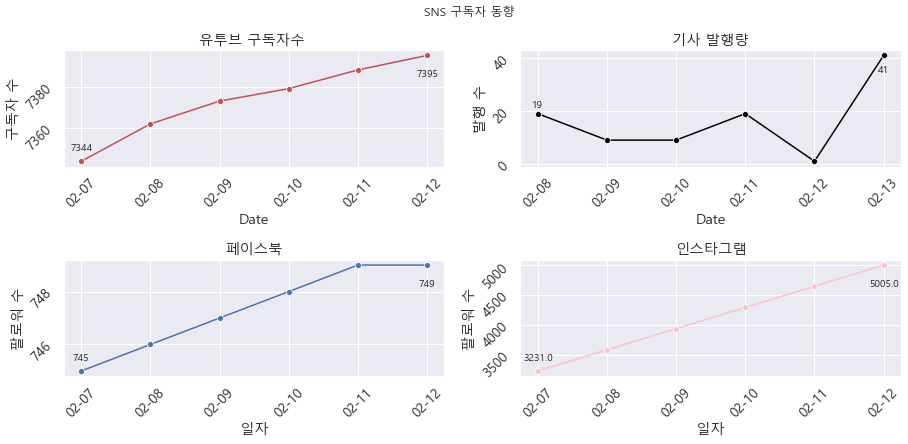

In [124]:
fig, axes = plt.subplots(2,2, figsize=(15,6))
fig.suptitle("SNS 구독자 동향")
plt.subplots_adjust(hspace=0.8)
sns.lineplot(ax=axes[0,0] ,x="Date", y="Counts", color='r', data=yt_follower, marker="o")
axes[0,0].set_title("유투브 구독자수 ")
axes[0,0].set_ylabel("구독자 수")

start_x, start_y = yt_follower["Date"].head(1).item(), yt_follower["Counts"].head(1).item()
end_x, end_y = yt_follower["Date"].tail(1).item(), yt_follower["Counts"].tail(1).item()
length = end_y - start_y

axes[0,0].text(start_x, start_y + length * 0.1, str(start_y), ha="center")
axes[0,0].text(end_x, end_y - length * 0.2, str(end_y), ha="center")
axes[0,0].tick_params(labelrotation=45)


sns.lineplot(ax=axes[0,1] ,x="Date", y="Counts", color='black', data=art_follower, marker="o")
axes[0,1].set_title("기사 발행량")
axes[0,1].set_ylabel("발행 수")
start_x, start_y = art_follower["Date"].head(1).item(), art_follower["Counts"].head(1).item()
end_x, end_y = art_follower["Date"].tail(1).item(), art_follower["Counts"].tail(1).item()
length = end_y - start_y

axes[0,1].text(start_x, start_y + length * 0.1, str(start_y), ha="center")
axes[0,1].text(end_x, end_y  - length * 0.3, str(end_y), ha="center")
axes[0,1].tick_params(labelrotation=45)




sns.lineplot(ax=axes[1,0] ,x="Date", y="Counts", data=fb_follower, marker="o")
axes[1,0].set_title("페이스북")
axes[1,0].set_xlabel("일자")
axes[1,0].set_ylabel("팔로워 수")
start_x, start_y = fb_follower["Date"].head(1).item(), fb_follower["Counts"].head(1).item()
end_x, end_y = fb_follower["Date"].tail(1).item(), fb_follower["Counts"].tail(1).item()
length = end_y - start_y

axes[1,0].text(start_x, start_y + length * 0.1, str(start_y), ha="center")
axes[1,0].text(end_x, end_y - length * 0.2, str(end_y), ha="center")
axes[1,0].tick_params(labelrotation=45)



sns.lineplot(ax=axes[1,1] ,x="Date", y="Counts", color='pink',
             data=insta_follower, marker="o")
axes[1,1].set_title("인스타그램")
axes[1,1].set_xlabel("일자")
axes[1,1].set_ylabel("팔로워 수")
start_x, start_y = insta_follower["Date"].head(1).item(), insta_follower["Counts"].head(1).item()
end_x, end_y = insta_follower["Date"].tail(1).item(), insta_follower["Counts"].tail(1).item()
length = end_y - start_y

axes[1,1].text(start_x, start_y + length * 0.1, str(start_y), ha="center")
axes[1,1].text(end_x, end_y - length * 0.2, str(end_y), ha="center")
axes[1,1].tick_params(labelrotation=45)


plt.savefig("../weekly_plots/{}/sns_overall.png".format(date_week), transparent=True)

## Youtube 조회수 그래프

In [125]:
df_yt_chart_data = pd.read_csv("../sns_data/{}/youtube/Chart data.csv".format(date_week))
df_yt_chart_data =  df_yt_chart_data.dropna()
df_yt_chart_data['Video publish time'] = pd.to_datetime(df_yt_table_data['Video publish time'])
df_yt_chart_data.head()

chart_df = df_yt_chart_data[["Date", "Video title", "Video publish time", "Views"]]


In [126]:
chart_df.head()

,Date,Video title,Video publish time,Views
0,2022-02-06,"패러다임 전환, 이후의 교육이 가야할 방향",NaT,0
1,2022-02-07,"패러다임 전환, 이후의 교육이 가야할 방향",2022-02-08,0
2,2022-02-08,"패러다임 전환, 이후의 교육이 가야할 방향",2022-02-07,0
3,2022-02-09,"패러다임 전환, 이후의 교육이 가야할 방향",2022-02-05,237
4,2022-02-10,"패러다임 전환, 이후의 교육이 가야할 방향",2021-09-08,251


In [127]:
grs = chart_df.groupby("Date")
view_gr_sum = grs.sum()
view_gr_sum.reset_index(inplace=True)
view_gr_sum.columns = ["Date", "조회 수"]
view_gr_sum['Date'] = pd.to_datetime(view_gr_sum['Date'])
view_gr_sum['Date'] = view_gr_sum['Date'].apply(lambda x : x.strftime("%m-%d"))

In [128]:
view_gr_sum

,Date,조회 수
0,02-06,259
1,02-07,1221
2,02-08,892
3,02-09,705
4,02-10,531
5,02-11,323
6,02-12,277


In [129]:
grs = chart_df.groupby("Video title")
title_gr_sum = grs.sum()
title_gr_sum.sort_values('Views', inplace=True, ascending=False)
title_gr_sum.reset_index(inplace=True)

title_gr_sum['Video title'].loc[0][:15]
title_gr_sum['Video title'] = title_gr_sum['Video title'].apply(lambda x : x[:20])
title_gr_sum['Video title'].iloc[4] = "누군가 국가를 위해"

title_gr_sum

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Video title,Views
0,자녀이야기 EP 4. 첫째아들편 -,1283
1,"김동연 후보, ""기득권 공화국에서 기",920
2,김동연의 송곳질문 부동산 폭락사태?,753
3,"패러다임 전환, 이후의 교육이 가야할",748
4,누군가 국가를 위해,504


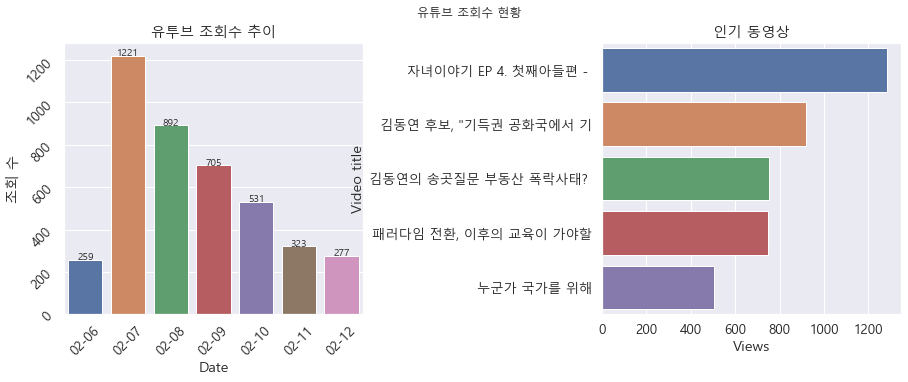

In [130]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("유튜브 조회수 현황")
plt.subplots_adjust(wspace=0.8)

# 유투브 조회수
sns.barplot(ax=axes[0] ,x="Date", y="조회 수", data=view_gr_sum)
axes[0].tick_params(labelrotation=45)
axes[0].set_title("유투브 조회수 추이")
for index, row in view_gr_sum.iterrows():
    axes[0].text(index, row['조회 수'], str(row['조회 수']), ha='center')
    
sns.barplot(ax=axes[1], x=title_gr_sum['Views'], y=title_gr_sum['Video title'])
axes[1].set_title("인기 동영상")
plt.savefig("../weekly_plots/{}/youtube_views.png".format(date_week), transparent=True)

## Datalab 

In [169]:
df_article.head()

,Unnamed: 0,title,originallink,link,description,pubDate
0,9,후보 등록하는 <b>김동연</b> 새로운물결 대선 후보,http://www.newsis.com/view/?id=NISI20220213_00...,https://news.naver.com/main/read.naver?mode=LS...,국회사진기자단 = <b>김동연</b> 새로운물결 대선 후보가 제20대 대통령 선거 ...,2022-02-13
1,10,"<b>김동연</b>, 후보 등록 신청…중도 사퇴 일축",http://www.edaily.co.kr/news/newspath.asp?news...,https://news.naver.com/main/read.naver?mode=LS...,출신인 <b>김동연</b> 새로운물결 대선 후보가 13일 오전 11시 중앙선거관리위...,2022-02-13
2,13,송영길 &quot;함께 잘 해보자&quot; <b>김동연</b> &quot;오늘 후...,https://www.news1.kr/articles/?4583377,https://news.naver.com/main/read.naver?mode=LS...,송영길 더불어민주당 대표와 <b>김동연</b> 새로운물결 대선 후보가 제20대 대통...,2022-02-13
3,14,후보 등록하는 <b>김동연</b> 새로운물결 대선 후보,http://www.newsis.com/view/?id=NISI20220213_00...,https://news.naver.com/main/read.naver?mode=LS...,국회사진기자단 = <b>김동연</b> 새로운물결 대선 후보가 제20대 대통령 선거 ...,2022-02-13
4,16,<b>김동연</b> 새로운물결 대선 후보 후보 등록,http://www.newsis.com/view/?id=NISI20220213_00...,https://news.naver.com/main/read.naver?mode=LS...,국회사진기자단 = <b>김동연</b> 새로운물결 대선 후보가 제20대 대통령 선거 ...,2022-02-13


In [132]:
art_views = df_article[["title", "pubDate"]]

grs = art_views.groupby("pubDate")
art_follower = grs.count()
art_follower.reset_index(inplace=True)
art_follower.columns = ["Date", "Counts"]
art_follower['Date'] = art_follower['Date'].apply(lambda x : x.strftime("%m-%d"))


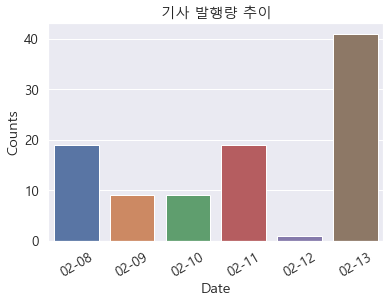

In [133]:
sns.barplot(x="Date", y="Counts", data=art_follower)
plt.xticks(rotation=30)
plt.title("기사 발행량 추이")
plt.savefig("../weekly_plots/{}/article_transparent.png".format(date_week), transparent=True)

<ipython-input-134-a846709c6319>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transperent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("../weekly_plots/{}/articles.png".format(date_week), transperent=True)


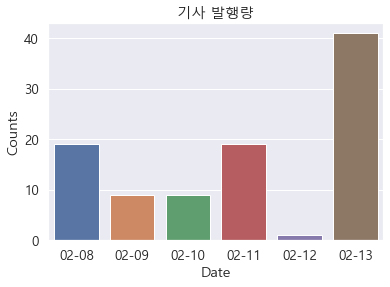

In [134]:
# fig, axes = plt.subplots(1,3, figsize=(15,5))
# fig.suptitle("기사 발행량 현황")
# plt.subplots_adjust()


    
# 유투브 조회수
sns.barplot(x="Date", y="Counts", data=art_follower)
# for index, row in art_follower.iterrows():
#     plt.text(index, row['Counts'], str(row['Counts']), ha='center')
plt.title("기사 발행량")
plt.savefig("../weekly_plots/{}/articles.png".format(date_week), transperent=True)
# ## Temp
# sns.barplot(ax=axes[1], x=title_gr_sum['Views'], y=title_gr_sum['Video title'])
# axes[1].set_title("인기 동영상")
# plt.savefig("../weekly_plots/2021-10-18/youtube_views.png")


C:\Users\User\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


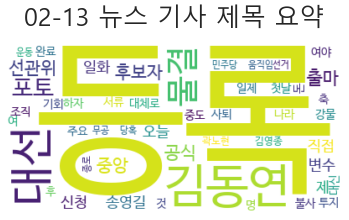

In [166]:
# WordCloud Previous and now
t = Twitter()

grp_keys = list(grs.groups.keys())

wcs = {}
for idx, k in enumerate(grp_keys):
    font_path = "./NanumBarunGothic.ttf"
    df_g = grs.get_group(k)
    title_txt = df_g.title.to_string()
    tokens = t.nouns(title_txt)
    ko = nltk.Text(tokens, name="뉴스 기사")
    data = ko.vocab().most_common(50)
    data = data[1:] # 김동연 제외
    wc = WordCloud(font_path=font_path, 
                   background_color="white", max_words=1000,max_font_size=300).generate_from_frequencies(dict(data))

    
    plt.title(k.strftime("%m-%d") + " 뉴스 기사 제목 요약", fontsize=25, pad=20)
    plt.imshow(wc, cmap=plt.cm.gray, interpolation="bilinear")
    plt.axis("off")
    wcs[idx] = wc
    #wc.to_file('../weekly_plots/2021-10-18/wc_{}_{}_week{}.png'.format(k.month, k.day, k.isocalendar()[1]))
    plt.savefig('../weekly_plots/{}/wc_{}_{}_week{}.png'.format(date_week, k.month, k.day, k.isocalendar()[1]), 
               transparent=True)

## Datalab

In [161]:
df_datalab = pd.read_csv("../sns_data/{}/datalab/datalab.csv".format(date_week))
df_datalab= df_datalab.iloc[6:]
df_datalab.columns = ["Date", "검색량"]
df_datalab['Date'] = pd.to_datetime(df_datalab['Date'])

df_datalab['Date'] = df_datalab['Date'].map(lambda x : x.strftime("%m-%d"))
df_datalab["검색량"]= df_datalab['검색량'].map(lambda x : float(x))

In [162]:
df_datalab.iloc[0:]

,Date,검색량
6,02-06,58.76719
7,02-07,75.98231
8,02-08,57.98133
9,02-09,56.94990
10,02-10,100.00000
11,02-11,67.68172
12,02-12,56.65520
13,02-13,87.15618


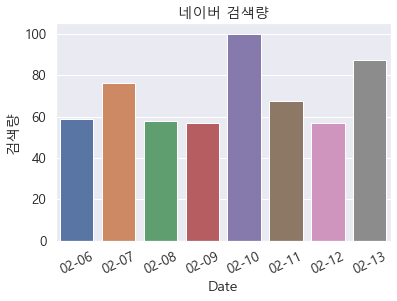

In [141]:
# 유투브 조회수
sns.barplot(x="Date", y="검색량", data=df_datalab)
plt.title("네이버 검색량")
plt.xticks(rotation=25)
plt.savefig("../weekly_plots/{}/datalab_search.png".format(date_week), transparent=True, dpi=100)

### test

In [ ]:
s